# Final Term

In [1]:
# importing libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore')

In [2]:
# Reading the 3 given data sets

train = pd.read_csv("E:/studies/methods and algorithms in machine learning -1/Final_Term/train_data-1599717478076.csv")
test = pd.read_csv("E:/studies/methods and algorithms in machine learning -1/Final_Term/test_data-1599717650029.csv")
sol = pd.read_csv("E:/studies/methods and algorithms in machine learning -1/Final_Term/solution-by-157-1599727408502-by-212-1632572167611.csv")

In [3]:
train.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2016-11-15 19:16:12+00:00,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2017-01-11 09:25:33+00:00,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2016-12-07 07:58:09+00:00,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2017-01-11 16:15:44+00:00,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-11-16 17:04:42+00:00,2,0


In [4]:
train.tail()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category,is_fraud
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2016-11-30 13:40:45+00:00,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2017-01-08 08:35:31+00:00,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2016-12-26 21:47:08+00:00,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2016-12-11 13:44:06+00:00,2,0
76528,1051344513778987,6754801,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-11 19:08:18+00:00,2,0


In [5]:
test.head()

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,transaction_initiation,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2016-12-28 14:44:37+00:00,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2016-12-14 17:49:48+00:00,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2017-01-21 10:18:11+00:00,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,2017-01-16 13:25:10+00:00,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2017-02-09 12:47:28+00:00,2


In [6]:
sol.head()

,transaction_number,is_fraud
0,857050141038272,0
1,4400462872603,0
2,1207915598569499,0
3,2009725616777536,0
4,2319205210274863,0


In [7]:
train.shape

(76529, 11)

In [8]:
test.shape

(19133, 10)

In [9]:
sol.shape

(19133, 2)

In [10]:
train.columns

Index(['transaction_number', 'user_id', 'payment_method', 'partner_id',
       'partner_category', 'country', 'device_type', 'money_transacted',
       'transaction_initiation', 'partner_pricing_category', 'is_fraud'],
      dtype='object')

In [11]:
train.describe() 

,transaction_number,user_id,partner_id,money_transacted,partner_pricing_category,is_fraud
count,7.652900e+04,7.652900e+04,76529.000000,76529.000000,76529.000000,76529.000000
mean,6.940200e+14,1.247483e+07,58497.189105,132.724348,2.255707,0.002012
std,7.867885e+14,1.205878e+07,36740.216787,2350.110900,0.732174,0.044814
min,8.000000e+00,1.000000e+00,7889.000000,-20000.000000,0.000000,0.000000
25%,4.387866e+13,3.515625e+06,23667.000000,-1.000000,2.000000,0.000000
50%,3.452540e+14,9.753129e+06,47334.000000,20.000000,2.000000,0.000000
75%,1.173440e+15,1.788444e+07,78890.000000,52.000000,2.000000,0.000000
max,2.784238e+15,5.592048e+07,213003.000000,197217.760000,4.000000,1.000000


In [12]:
train.nunique()

transaction_number          76529
user_id                      3594
payment_method                  6
partner_id                     23
partner_category                9
country                         1
device_type                     4
money_transacted             1454
transaction_initiation      75811
partner_pricing_category        4
is_fraud                        2
dtype: int64

In [13]:
train.isna().sum()

transaction_number          0
user_id                     0
payment_method              0
partner_id                  0
partner_category            0
country                     0
device_type                 0
money_transacted            0
transaction_initiation      0
partner_pricing_category    0
is_fraud                    0
dtype: int64

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76529 entries, 0 to 76528
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_number        76529 non-null  int64  
 1   user_id                   76529 non-null  int64  
 2   payment_method            76529 non-null  object 
 3   partner_id                76529 non-null  int64  
 4   partner_category          76529 non-null  object 
 5   country                   76529 non-null  object 
 6   device_type               76529 non-null  object 
 7   money_transacted          76529 non-null  float64
 8   transaction_initiation    76529 non-null  object 
 9   partner_pricing_category  76529 non-null  int64  
 10  is_fraud                  76529 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 6.4+ MB


In [15]:
train.drop("transaction_initiation",axis =1,inplace = True)

In [16]:
test.drop("transaction_initiation", axis = 1, inplace = True)

In [17]:
train.shape

(76529, 10)

In [18]:
test.shape

(19133, 9)

In [19]:
train

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category,is_fraud
0,144703125000,17539344,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-5.0,2,0
1,77406814453032,24710841,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,100.0,2,0
2,308929485482801,24265476,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,50.0,2,0
3,665270027747073,10240000,other_debit_cards,102557,cat_3,IND_INR,other_pcs,1000.0,2,0
4,38276160171101,5880625,other_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2,0
...,...,...,...,...,...,...,...,...,...,...
76524,179759462245453,19686969,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2,0
76525,2693567760244353,11662225,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2,0
76526,119750257089000,374544,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-3.5,2,0
76527,1949798765017089,1687401,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-20.0,2,0


In [20]:
test

,transaction_number,user_id,payment_method,partner_id,partner_category,country,device_type,money_transacted,partner_pricing_category
0,857050141038272,3802500,visa_master_debit_cards,118335,cat_1,IND_INR,other_pcs,200.0,2
1,4400462872603,200704,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2
2,1207915598569499,25150225,sbi_atm_cum_debit_card,47334,cat_1,IND_INR,android_devices,-100.0,2
3,2009725616777536,21827584,visa_master_credit_cards,78890,cat_2,IND_INR,other_pcs,200.0,1
4,2319205210274863,576081,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,100.0,2
...,...,...,...,...,...,...,...,...,...
19128,5332775378111,13235044,e_wallet_payments,23667,cat_2,IND_INR,other_pcs,20.0,2
19129,939262915465237,12257001,e_wallet_payments,78890,cat_2,IND_INR,other_pcs,30.0,2
19130,18324574916544,5958481,visa_master_debit_cards,23667,cat_2,IND_INR,other_pcs,20.0,4
19131,893473728055875,53919649,sbi_atm_cum_debit_card,78890,cat_2,IND_INR,android_devices,-500.0,4


In [21]:
transaction_number = test['transaction_number']

In [22]:
transaction_number

0         857050141038272
1           4400462872603
2        1207915598569499
3        2009725616777536
4        2319205210274863
               ...       
19128       5332775378111
19129     939262915465237
19130      18324574916544
19131     893473728055875
19132      84390778936647
Name: transaction_number, Length: 19133, dtype: int64

In [23]:
# dropping the unnecessary columns with ids in train and test data

train.drop(['transaction_number','user_id','partner_id'], axis =1,inplace = True)
test.drop(['transaction_number','user_id','partner_id'], axis =1,inplace = True)

In [24]:
#dropping country column as it has only one level.

train.drop('country', axis =1,inplace = True)
test.drop('country', axis =1,inplace = True)

In [25]:
# creating a column transaction_type in train and test data

train['transaction_type'] = np.where(
train['money_transacted'] <= 0 ,'credit', np.where(
train['money_transacted'] > 0, 'debit',0)) 

In [26]:
test['transaction_type'] = np.where(
test['money_transacted'] <= 0 ,'credit', np.where(
test['money_transacted'] > 0, 'debit',0)) 

In [27]:
train

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,is_fraud,transaction_type
0,sbi_atm_cum_debit_card,cat_1,android_devices,-5.0,2,0,credit
1,e_wallet_payments,cat_2,other_pcs,100.0,2,0,debit
2,e_wallet_payments,cat_2,other_pcs,50.0,2,0,debit
3,other_debit_cards,cat_3,other_pcs,1000.0,2,0,debit
4,other_debit_cards,cat_1,other_pcs,200.0,2,0,debit
...,...,...,...,...,...,...,...
76524,sbi_atm_cum_debit_card,cat_1,android_devices,-100.0,2,0,credit
76525,visa_master_debit_cards,cat_1,other_pcs,200.0,2,0,debit
76526,sbi_atm_cum_debit_card,cat_1,android_devices,-3.5,2,0,credit
76527,sbi_atm_cum_debit_card,cat_1,android_devices,-20.0,2,0,credit


In [28]:
test

,payment_method,partner_category,device_type,money_transacted,partner_pricing_category,transaction_type
0,visa_master_debit_cards,cat_1,other_pcs,200.0,2,debit
1,e_wallet_payments,cat_2,other_pcs,20.0,2,debit
2,sbi_atm_cum_debit_card,cat_1,android_devices,-100.0,2,credit
3,visa_master_credit_cards,cat_2,other_pcs,200.0,1,debit
4,e_wallet_payments,cat_2,other_pcs,100.0,2,debit
...,...,...,...,...,...,...
19128,e_wallet_payments,cat_2,other_pcs,20.0,2,debit
19129,e_wallet_payments,cat_2,other_pcs,30.0,2,debit
19130,visa_master_debit_cards,cat_2,other_pcs,20.0,4,debit
19131,sbi_atm_cum_debit_card,cat_2,android_devices,-500.0,4,credit


# Data Visualizations

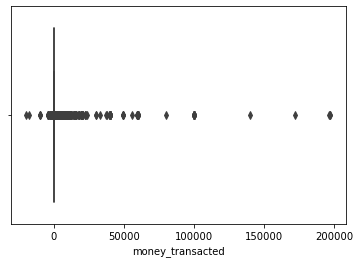

In [29]:
ax = sns.boxplot(x=train["money_transacted"])

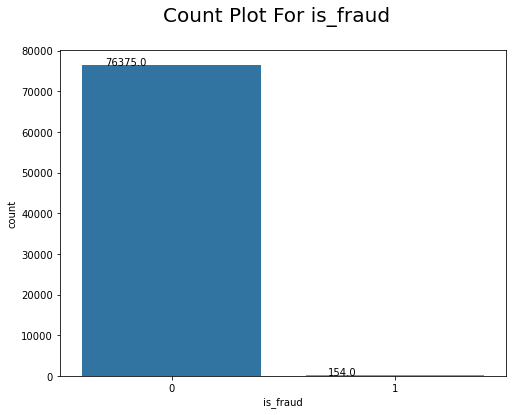

In [30]:
plt.figure(figsize = (8,6))           
ax = sns.countplot(train["is_fraud"])
plt.suptitle("Count Plot For is_fraud", fontsize=20)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

# Out of 76529 transactions 154 i.e. 0.2012% are defaulted

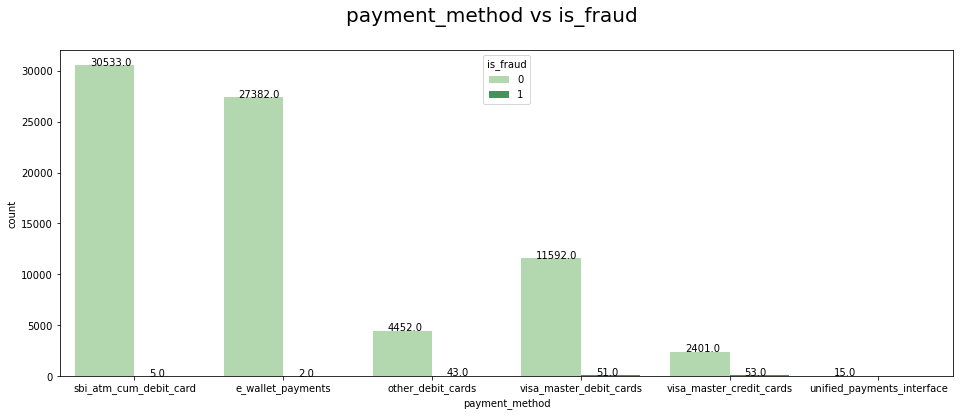

In [31]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=train,x='payment_method',hue='is_fraud',palette='Greens')
plt.suptitle("payment_method vs is_fraud", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

plt.show()

#most of the frauds are happening in other debitcards,visa_master_debit and credit cards.

Text(0.5, 0.98, 'payment_method vs money_transacted vs fraud')

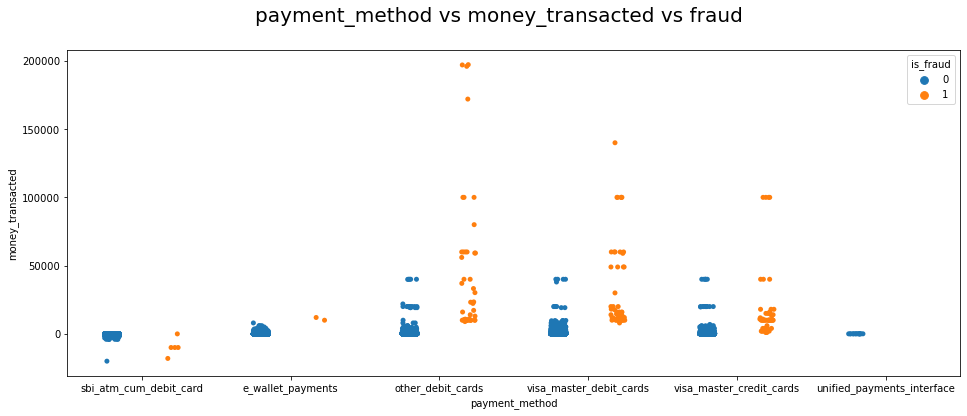

In [32]:
plt.figure(figsize = (16,6))
ax = sns.stripplot(x='payment_method', y='money_transacted', data=train,
              jitter=True, hue='is_fraud', dodge=True)
plt.suptitle("payment_method vs money_transacted vs fraud", fontsize=20)

#most of the frauds are happening in other debitcards,visa_master_debit and credit cards.

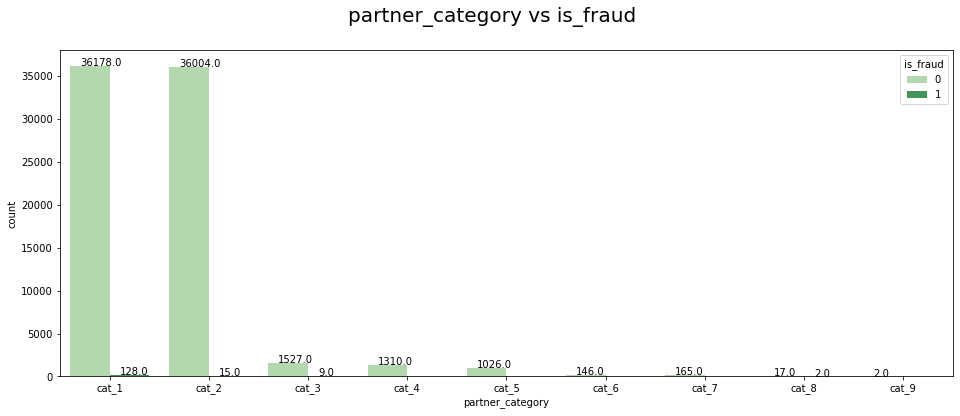

In [33]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=train,x='partner_category',hue='is_fraud',palette='Greens')
plt.suptitle("partner_category vs is_fraud", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

plt.show()

# Out of 152 frauds all of them are from partner_category 1,2,3,8.

Text(0.5, 0.98, 'partner_category vs money_transacted vs fraud')

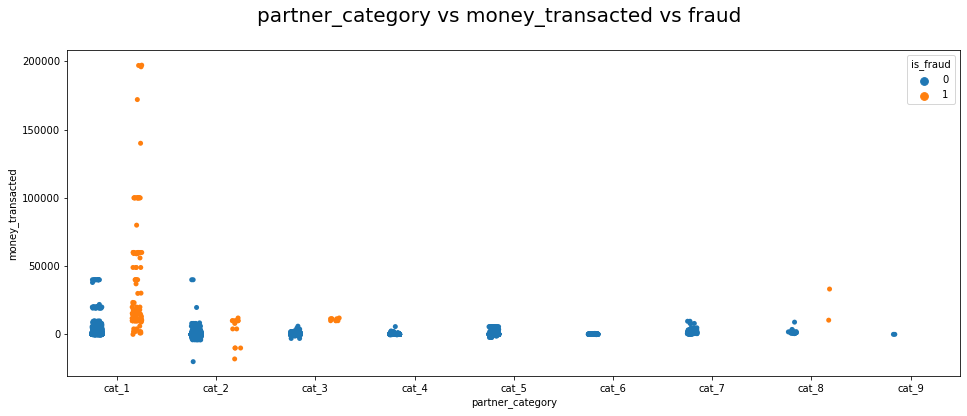

In [34]:
plt.figure(figsize = (16,6))
ax = sns.stripplot(x='partner_category', y='money_transacted', data=train,
              jitter=True, hue='is_fraud', dodge=True)
plt.suptitle("partner_category vs money_transacted vs fraud", fontsize=20)

# Out of 152 frauds most of them are from partner_category 1,2,3,8.

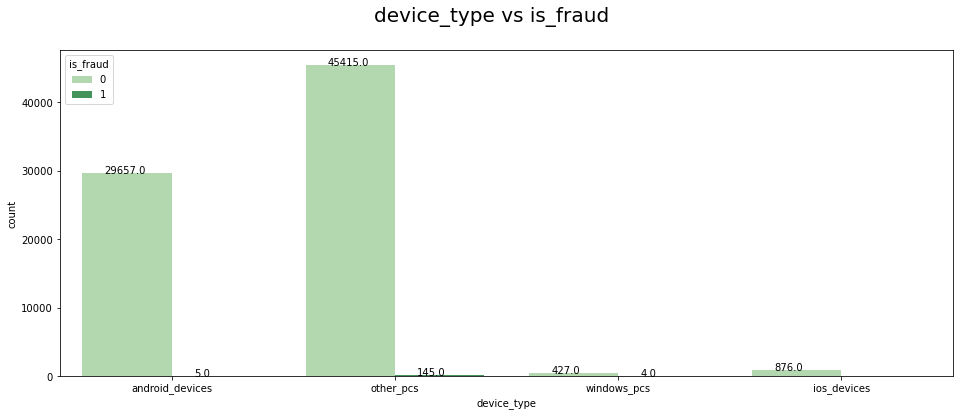

In [35]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=train,x='device_type',hue='is_fraud',palette='Greens')
plt.suptitle("device_type vs is_fraud", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


plt.show()

#most of the frauds are happening through cards mostly in other debitcards,visa_master_debit and credit cards.As per the data frauds are not happening in the UPI payments.

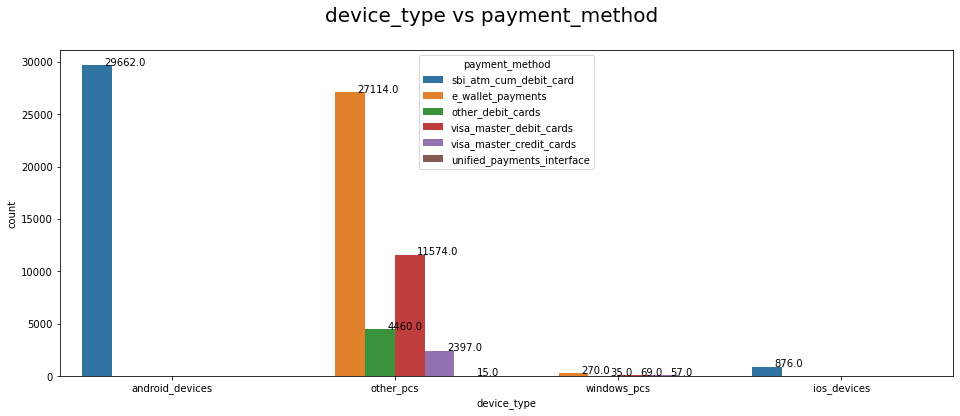

In [36]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=train,x='device_type',hue='payment_method')
plt.suptitle("device_type vs payment_method", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


plt.show()

Text(0.5, 0.98, 'device_type vs money_transacted vs fraud')

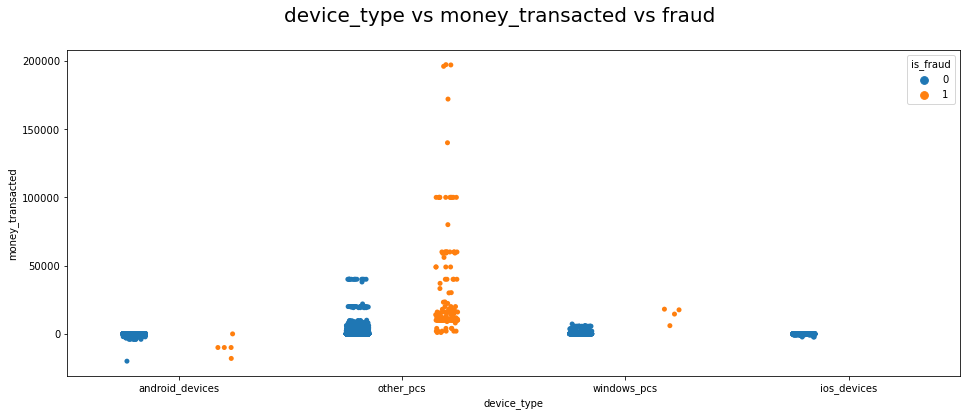

In [37]:
plt.figure(figsize = (16,6))
ax = sns.stripplot(x='device_type', y='money_transacted', data=train,
              jitter=True, hue='is_fraud', dodge=True)
plt.suptitle("device_type vs money_transacted vs fraud", fontsize=20)

# Most of the  frauds are happening in other pcs

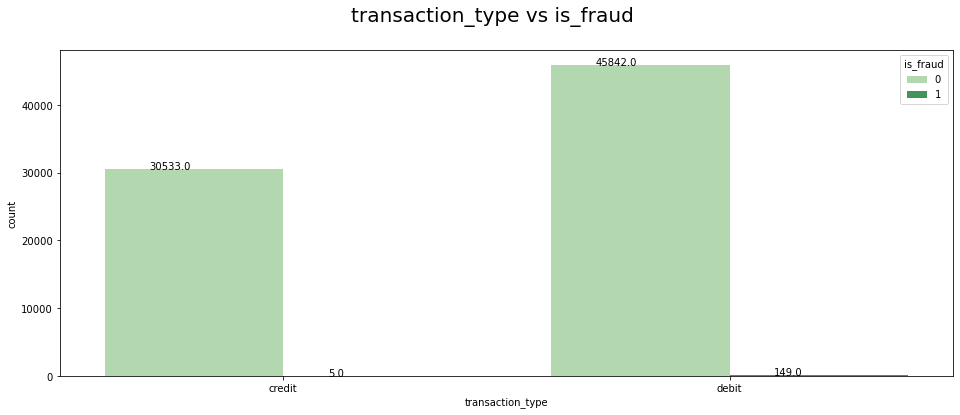

In [38]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=train,x='transaction_type',hue='is_fraud',palette='Greens')
plt.suptitle("transaction_type vs is_fraud", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


plt.show()

# most of the frauds are happening through debit process.

Text(0.5, 0.98, 'transaction_type vs money_transacted vs fraud')

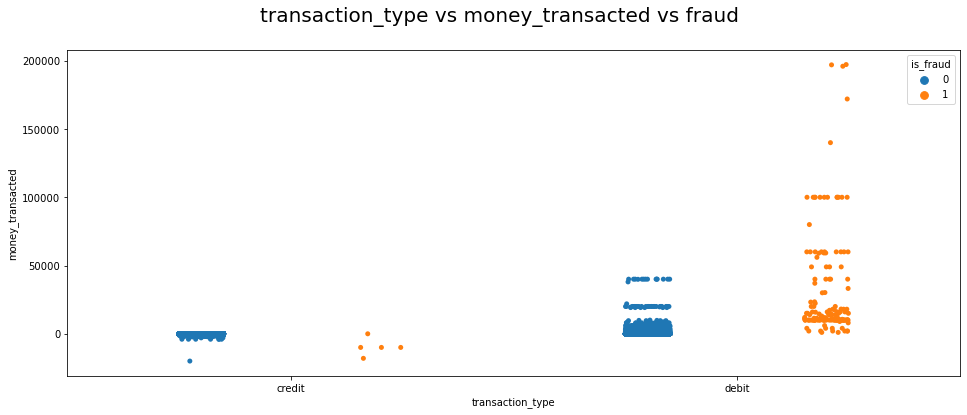

In [39]:
plt.figure(figsize = (16,6))
ax = sns.stripplot(x='transaction_type', y='money_transacted', data=train,
              jitter=True, hue='is_fraud', dodge=True)
plt.suptitle("transaction_type vs money_transacted vs fraud", fontsize=20)

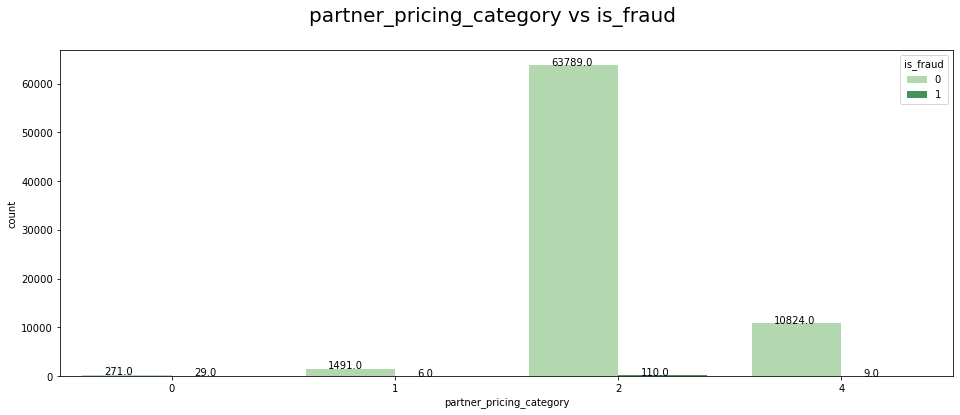

In [40]:
plt.figure(figsize=(16,6))
zx = sns.countplot(data=train,x='partner_pricing_category',hue='is_fraud',palette='Greens')
plt.suptitle("partner_pricing_category vs is_fraud", fontsize=20)

for p in zx.patches:
        zx.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))


plt.show()

Text(0.5, 0.98, 'partner_pricing_category vs money_transacted vs fraud')

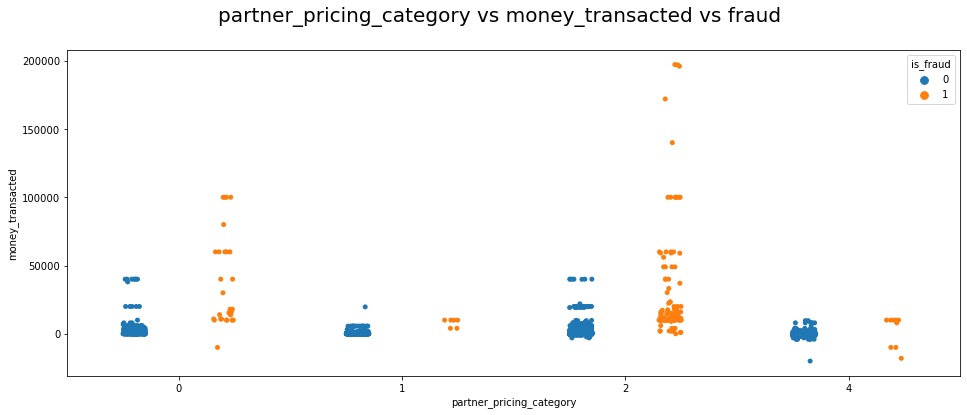

In [41]:
plt.figure(figsize = (16,6))
ax = sns.stripplot(x='partner_pricing_category', y='money_transacted', data=train,
              jitter=True, hue='is_fraud', dodge=True)
plt.suptitle("partner_pricing_category vs money_transacted vs fraud", fontsize=20)

In [42]:
# Dummifying the variables
dummies_train = pd.get_dummies(train[['payment_method','partner_category','device_type','partner_pricing_category','transaction_type']],drop_first=True)
dummies_test = pd.get_dummies(test[['payment_method','partner_category','device_type','partner_pricing_category','transaction_type']],drop_first=True)

In [43]:
# joining the train and dummies data
train = pd.concat([train,dummies_train],axis=1)

In [44]:
# joining the test and dummies data
test = pd.concat([test,dummies_test],axis=1)

In [45]:
# dropping the dummified columns

train.drop(['payment_method','partner_category','device_type','partner_pricing_category','partner_category_cat_9','transaction_type'], axis =1,inplace = True)
test.drop(['payment_method','partner_category','device_type','partner_pricing_category','transaction_type'], axis =1,inplace = True)

In [46]:
train

,money_transacted,is_fraud,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,partner_category_cat_2,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs,transaction_type_debit
0,-5.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,100.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,50.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
3,1000.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,200.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76524,-100.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76525,200.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
76526,-3.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76527,-20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
test

,money_transacted,payment_method_other_debit_cards,payment_method_sbi_atm_cum_debit_card,payment_method_unified_payments_interface,payment_method_visa_master_credit_cards,payment_method_visa_master_debit_cards,partner_category_cat_2,partner_category_cat_3,partner_category_cat_4,partner_category_cat_5,partner_category_cat_6,partner_category_cat_7,partner_category_cat_8,device_type_ios_devices,device_type_other_pcs,device_type_windows_pcs,transaction_type_debit
0,200.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
1,20.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
2,-100.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,200.0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1
4,100.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19128,20.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
19129,30.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1
19130,20.0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1
19131,-500.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Model Building

In [48]:
y_train = train['is_fraud']
x_train = train.drop(['is_fraud'], axis = 1)

In [49]:
x_test = test

In [50]:
y_test = sol

# KNN classifier

In [51]:
# importing the KNN classifier model

from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=10, metric='minkowski', p=2 )  

#Fitting the train datas in model

classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=10)

In [52]:
# predicting the target variable
pred_knn = classifier.predict(x_test) 

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test.is_fraud, pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       1.00      0.69      0.82        39

    accuracy                           1.00     19133
   macro avg       1.00      0.85      0.91     19133
weighted avg       1.00      1.00      1.00     19133



In [56]:
# importing confusion matrix

from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test.is_fraud , pred_knn).ravel()
print('True negatives: ', tn, '\nFalse positives: ', fp, '\nFalse negatives: ', fn, '\nTrue Positives: ', tp)

True negatives:  19094 
False positives:  0 
False negatives:  12 
True Positives:  27


# Recommendations for IndAvenue

In [57]:
# most of the frauds are happening through cards mostly in other debitcards,visa_master_debit and credit cards.Company should encourage customers
# to use UPI payments as per the data frauds are not happening in the UPI payments,company can charge customers for card payments.
# In partner_category in Cat_1 frauds are happening mostly,company should verify the background of that category customers carefully.
# In device_type most of the frauds are happening in other_pcs, company should classify them into specific categories so that more clarity will be there towards data.
# As per data ios devices have no frauds may be because of the security that ios_devices have,company should keep their customer detsils secure.

# simplest strategies would you use to ensure fastcustomer checkout

In [58]:
# Simplify the process of payment.
# fast UI about payment.